## Overview (from README.md)

In [1]:
from IPython import display

display.Markdown('README.md')

# Experimenting with Mediawiki API and network graphs

[![nbviewer](https://raw.githubusercontent.com/jupyter/design/master/logos/Badges/nbviewer_badge.svg)](https://nbviewer.jupyter.org/github/UncleCJ/pywikibot-gephi-experiments/blob/dev3/pywikibot2gephi.ipynb) [![Binder](https://mybinder.org/badge_logo.svg)](https://mybinder.org/v2/gh/UncleCJ/pywikibot-gephi-experiments/dev3?filepath=pywikibot2gephi.ipynb)

This README is included in the [pywikibot2gephi.ipynb Jupyter notebook](pywikibot2gephi.ipynb), you might as well head right over there.

## TL;DR;

> These are my experiments in learning how to use any Mediawiki API through Pywikibot to collect any data I am interested in processing as a network graph (originally in convenient tool Gephi). Besides pretty pictures, network graphs offer powerful methods to visualize and elucidate data in ways which would be difficult otherwise. Two applications I have in mind are are [story narrative charts](https://xkcd.com/657) and as aid in corporate wiki management.


## Overview

For [the longest time](http://unclecj.blogspot.com/search/label/gephi), I've enjoyed playing with various types of network graphs, mainly using the revered open source tool [Gephi](https://github.com/gephi/gephi). However, data acquisition and preparation is usually the challenge, so I've been wanting to get into programmatic ways of working with the data. I haven't so far explored... lower-level tools like [neo4j](https://neo4j.com) or [Wikibase](https://wikiba.se) (together with [Mediawiki](https://www.mediawiki.org/wiki/MediaWiki) the software powering [Wikidata](https://www.wikidata.org/wiki/Wikidata:Main_Page), itself the structured data storage behind [Wikipedia](https://www.wikipedia.org/)).

From the beginning, I've usually fed Gephi by creating some type of CSV/spreadsheet [node-, edge lists or adjacency matrix](https://gephi.org/users/supported-graph-formats/csv-format/). With some learning effort and assuming your data is in for instance Wikidata, you can feed it from the [SemanticWebImport Gephi plugin](https://github.com/gephi/gephi/wiki/SemanticWebImport) and SPARQL queries (see my [previous tutorial on that](https://gist.github.com/UncleCJ/2408aef8eab09cc1da3404c5af43537b)). There is also the option to simply [scrape the web](https://medium.com/@dakarabas/how-to-easily-visualize-your-internal-links-with-python-4467ef1e8c4d) (that example using [Beautiful Soup](https://www.crummy.com/software/BeautifulSoup/), [Selenium](https://www.selenium.dev), [Pandas](https://github.com/pandas-dev/pandas), [NetworkX](https://github.com/networkx/networkx) and [Matplotlib](https://github.com/matplotlib/matplotlib)), but that can easily get messy.

Thus follows my current toolchain - there are lots of exciting data accessible through the [Mediawiki APIs](https://www.mediawiki.org/wiki/API:Main_page) (not only Wikipedia but also sites in the [Fandom/Wikia family](https://en.wikipedia.org/wiki/Fandom_(website)) or perhaps your corporate wiki?). [Pywikibot](https://github.com/wikimedia/pywikibot) offers a convenient and well-used (though not as well documented?) Python wrapping for Mediawiki API, such as authentication, parsing, caching and configurable throttling. [igraph](https://github.com/igraph/python-igraph) (n.b. `python-igraph`) seems sensible and provides an interface to the [Gephi GraphStreaming plugin](https://github.com/gephi/gephi/wiki/GraphStreaming). Jupyter notebooks are practically a given (see also my [advent-of-code solutions](https://github.com/UncleCJ/advent-of-code), also in Jupyter notebooks)

As for potential paths of development, for when you don't have Gephi running along the notebook, [one could opt for NetworkX](https://www.reddit.com/r/Python/comments/4g9lp0/comment/d2i0r45/?utm_source=share&utm_medium=web2x&context=3) as well as further usage of [IPython.display](https://ipython.readthedocs.io/en/stable/api/generated/IPython.display.html), or even trying out something like [pyvis](https://github.com/WestHealth/pyvis) (article [here](https://towardsdatascience.com/pyvis-visualize-interactive-network-graphs-in-python-77e059791f01), see also their [two](https://towardsdatascience.com/visualising-graph-data-with-python-igraph-b3cc81a495cf) previous [articles](https://towardsdatascience.com/newbies-guide-to-python-igraph-4e51689c35b4)).

Wikimedians may expect [more Wikidata](https://www.wikidata.org/wiki/Wikidata:Pywikibot_-_Python_3_Tutorial) or even [PAWS](https://wikitech.wikimedia.org/wiki/PAWS), but that's not where I'm going currently.

For inspiration, I draw mainly on [Aidan Hogan](https://github.com/aidhog) et al. article "[Knowledge Graphs (extended version)](https://aidanhogan.com)" and [Alberto Cottica](https://github.com/albertocottica) et al. presentation "[People, words, data: Harvesting collective intelligence](https://edgeryders.eu/t/internet-of-humans-matchmaking-event-in-stockholm/9705/81?u=unclecj)" and article "[Semantic Social Networks: A Mixed Methods Approach to Digital Ethnography](https://journals.sagepub.com/doi/10.1177/1525822X20908236)"

## Usage


* Have [Python 3.x](https://www.python.org/downloads) with [Jupyter](https://pypi.org/project/jupyter) and preferably something like [virtualenv](https://pypi.org/project/virtualenv) installed
* Define a virtualenv or similar to keep dependencies managable for this project: `virtualenv ./venv` . Activate it like `source venv/bin/activate`. In it, `pip install -r requirements.txt`
* IDEs like [VS Code](https://code.visualstudio.com/docs/python/environments) may pick up on your virtualenv, or you may have to [register it with IPython](https://www.janmeppe.com/blog/how-to-add-new-kernel-in-jupyter-notebook)
* Open the notebook in your IDE, or through Jupyter: `jupyter pywikibot2gephi.ipynb`
* _Optionally, install [Gephi (0.9.2)](https://gephi.org/users/download), start it and activate the [Graph Streaming](https://gephi.org/plugins/#/plugin/graphstreaming) "master server"_
* Run, explore and modify the examples!

Alternatively, just click the ["launch binder" button](https://mybinder.org/v2/gh/UncleCJ/pywikibot-gephi-experiments/dev2?filepath=pywikibot2gephi.ipynb) and [mybinder.org](https://mybinder.org/) together with [repo2docker GitHub Actions](https://discourse.jupyter.org/t/how-to-reduce-mybinder-org-repository-startup-time/4956/2) should have all the requirements sorted for you in a jiffy (obviously a binder won't be able to connect to a local Gephi). Another option is to install the notebook in [PAWS: A Web Shell (PAWS)](https://wikitech.wikimedia.org/wiki/PAWS), but I haven't tried that.


## Changelog

### 2021-10-16

Cleaned up the project, wrote down (and reconstructed) this README. Currently working in the `dev3` branch, because of how I want things tidy before I set them in stone (a.k.a. `main`)
### 2021-10-10

Created this repository and started my experiments. Yesterday I confirmed that by hard-coding our corporate SSO session cookie (figure out a way to pull it from the browser?) in [`pywikibot.lwp`](https://github.com/wikimedia/pywikibot/blob/master/pywikibot/comms/http.py) ("[Set-Cookie3 format](https://docs.python.org/2/library/cookielib.html#filecookiejar-subclasses-and-co-operation-with-web-browsers)"), the regular MediaWiki API of the corporate wiki is usable. So while this is playing around for personal education, my hope is it could be quite useful also for various methods of corporate information- and community management


## See also

* https://public.paws.wmcloud.org/309423/ds4ux/jupyter-intro.ipynb
* https://public.paws.wmcloud.org/19781798/WikidataMapMakingWorkshop/WikidataMapMakingWorkshop.ipynb
* https://pythonrepo.com/repo/markusschanta-awesome-jupyter-python-repl
* https://heardlibrary.github.io/digital-scholarship/host/wikidata/bot/
* https://heardlibrary.github.io/digital-scholarship/host/wikidata/pywikibot/
* https://cambridge-intelligence.com/python-graph-visualization-using-jupyter-regraph/
* http://compbio.ucsd.edu/bringing-interactivity-network-visualization-jupyter-notebooks-visjs2jupyter/
* https://ipython-books.github.io/64-visualizing-a-networkx-graph-in-the-notebook-with-d3js/
* https://melaniewalsh.github.io/Intro-Cultural-Analytics/06-Network-Analysis/02-Making-Network-Viz-with-Bokeh.html
* https://github.com/adamhajari/nbgitconvert
* https://medium.com/@mjspeck/presenting-code-using-jupyter-notebook-slides-a8a3c3b59d67
* https://www.blog.pythonlibrary.org/2018/09/25/creating-presentations-with-jupyter-notebook/


## Introduction - Parse mediawiki pages into igraph

Imports are as expected. Note that the pip package for igraph (for now) is `python-igraph`. See the **Usage** section regarding general information on how you should and can run this code (as soon as it is described).

In [2]:
import pywikibot
import igraph as ig
import igraph.remote.gephi as igg

import matplotlib.pyplot as plt


Pywikibot encodes its configuration of each mediawiki it may operate on (wikipedias in different languages, wikidata, other mediawikis etc.) in "families". Thus in `user-config.py` we have as an example encoded the basic configuration to work on the [Mr Robot Fandom wiki](https://mrrobot.fandom.com):

In [3]:
display.Code('user-config.py')

mylang = 'mrrobot'
family = 'mrrobot'
usernames['mrrobot']['en'] = 'ExampleBot'
family_files['mrrobot'] = 'https://mrrobot.fandom.com/api.php'

Instantiate pywikibot mediawiki as defined in `user-config.py`. In this case an `AutoFamily` is sufficient, otherwise consider the [`families/` folder beneath where pywikibot is located](https://www.mediawiki.org/wiki/Manual:Pywikibot/Use_on_third-party_wikis).

In [4]:
site = pywikibot.Site()

Instantiate two [`pywikibot.Page`s](https://doc.wikimedia.org/pywikibot/master/api_ref/pywikibot.page.html), corresponding to two we know exist in our example wiki. Note that I don't think any API calls are made yet, but only as you access any attributes, and then they seem [cached](https://github.com/wikimedia/pywikibot/blob/master/scripts/maintenance/cache.py) and [throttled](https://doc.wikimedia.org/pywikibot/stable/api_ref/pywikibot.site.html#pywikibot.site.BaseSite.throttle) for sanity, as well as [controllable content fetching](https://doc.wikimedia.org/pywikibot/master/api_ref/pywikibot.page.html#pywikibot.page.BasePage) or [prefetched in page generators](https://doc.wikimedia.org/pywikibot/master/api_ref/pywikibot.html#module-pywikibot.pagegenerators).

In [5]:
page1 = pywikibot.Page(site, 'Eps1.1 ones-and-zer0es.mpeg')
page2 = pywikibot.Page(site, 'Elliot Alderson')

Manually, for now, prepare two attribute dictionaries from each `Page`, to be added as nodes in our graph. Note that at least igraph will not take care of all compatibility issues with `GephiGraphStreamer`. Some I have come across are:

* Node/edge IDs and duplicates - recent documentation suggests igraph will efficiently cope with looking nodes up by name, but as you may add many duplicates if you are careless, Gephi will object to receiving them (or for instance subsequent edges referring to them). Similarly I am considering a utility method to increment edge weight rather than adding a duplicate
* Attributes may be `None` in igraph, but will be rejected by Gephi - this is particularly inconvenient if you increase the number of attributes at runtime
* igraph may accept for instance method objects, but Gephi require them to be serializable (or even simple types according to each attribute?)

In [6]:
page1_attributes = {
    'name': page1.title(), 
    # Note how several attributes/properties are methods, while this is an int
    'pageid': page1.pageid,
    'revision_count': page1.revision_count(),
    # pywikibot frequently returns objects which may not be serializable
    'namespace': str(page1.namespace()),
    # again, here we convert Category objects into a string
    'categories': ';'.join([category.title() for category in page1.categories()]),
    # Contributors are a dict of usernames and number of revisions
    'contributors': ';'.join(page1.contributors().keys()),
    }

# We will have a function to perform this shortly
page2_attributes = {
    'name': page2.title(), 
    'pageid': page2.pageid,
    'revision_count': page2.revision_count(),
    'namespace': str(page2.namespace()),
    'categories': ';'.join([category.title() for category in page2.categories()]),
    'contributors': ';'.join(page2.contributors().keys()),
    }

Instantiate our [`igraph.Graph` object](https://igraph.org/python/doc/api/igraph.Graph.html). I'm curious whether this and [`pywikibot.Site`](https://doc.wikimedia.org/pywikibot/stable/api_ref/pywikibot.site.html) are possible and useful to [pickle](https://docs.python.org/3/library/pickle.html) to resume a previous session. Regardless I am likely to write some experiment class to keep these for me.

In [7]:
g = ig.Graph()

Perform some automated housekeeping on the page attribute dictionaries and add them as vertices:

In [8]:
for attributes in page1_attributes, page2_attributes:
    # Gephi expect vertex/node names in the `Label` field
    attributes['Label'] = attributes['name']
    # igraph.UniqueIdGenerator will retrieve an ID if key exists, or register the next one
    attributes['id'] = vertex_ids[attributes['name']]
    # ... so make sure to add the vertice/vertex if you generate IDs:
    g.add_vertices(1, attributes)

Once added, page attributes are now [igraph vertices](https://igraph.org/python/api/latest/igraph._igraph.Vertex.html) in the [`igraph.Graph.vs` array property](https://igraph.org/python/doc/api/igraph.Graph.html#vs):

In [9]:
for v in g.vs:
    print(f'g.vs[{v.index}]["name"]: {v["name"]}')

g.vs[0]["name"]: Eps1.1 ones-and-zer0es.mpeg
g.vs[1]["name"]: Elliot Alderson


Looking up the index of our recently added vertices (could have read it doing single `g.add_vertex` too), we can add our first edge! [`igraph.Graph.add_vertices`](https://igraph.org/python/api/latest/igraph.Graph.html#add_vertices) and [`add_edges`](https://igraph.org/python/api/latest/igraph.Graph.html#add_edges) are slightly curious about how you can add whole sequences or a single object to the graph, just note how they function. 

In [10]:
for attributes in [page1_attributes, page2_attributes]:
    attributes['id'] = g.vs.find(attributes['name']).index
    print(f'Page "{attributes["name"]}" got the index {attributes["id"]}')

g.add_edges([(page1_attributes['id'], page2_attributes['id'])])

Page "Eps1.1 ones-and-zer0es.mpeg" got the index 0
Page "Elliot Alderson" got the index 1


Pausing here for now - I would like to make the option to [display the graph in the notebook](https://igraph.org/python/doc/tutorial/visualisation.html) if Gephi isn't available, as well as render to image or graphml, but that's for later.

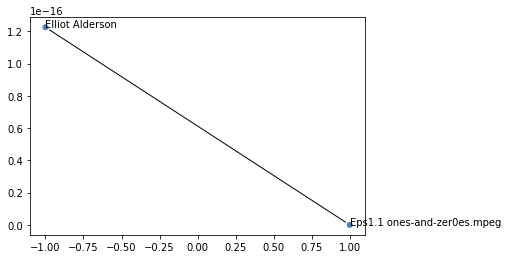

In [11]:
layout = g.layout(layout='circle')
fig, ax = plt.subplots()
ig.plot(g, layout=layout, target=ax, vertex_label=[v['name'] for v in g.vs])

## Part 2 - Graph housekeeping and crawling mediawikis for links

As mentioned above, let's create a utility method for managing vertices (and later, edges):

In [12]:
from pywikibot import pagegenerators

from typing import Optional, Any
from collections.abc import Iterable
import pandas as pd

def optional_method(c: callable, *args, **kwargs) -> Optional[Any]:
    try:
        return c(*args, **kwargs)
    except:
        return None

In [13]:
def has_vertex(g: ig.Graph, *args, **kwds) -> Optional[ig.Vertex]:
    return optional_method(g.vs.find, *args, **kwds)

In [14]:
def dict_lists(dicts: list[dict]):
    return {k: [dic[k] for dic in dicts]
            for k in dicts[0].keys()
            }

def dict_lists_item(dict_lists: list[dict], i: int):
    return {k: dict_lists[k][i] for k in dict_lists.keys()}

def list_dicts(dict_lists) -> list[dict]:
    return [dict(zip(dict_lists.keys(), t))
            for t in zip(*dict_lists.values())
            ]

In [15]:
def has_vertices(g: ig.Graph, *args, **kwds) -> list[Optional[ig.Vertex]]:
    if args:
        return [has_vertex(g, *single_args, **kwds) for single_args in zip(*args)]
    elif kwds:
        keys = list(kwds.keys())
        if len(keys) == 0:
            return (None)
        return [has_vertex(g, *args, **dict_lists_item(kwds, i)) 
                for i in range(len(kwds[keys[0]]))
                ]

In [16]:
def vertices_to_index(vs: Iterable[ig.Vertex]) -> list[Optional[int]]:
    return [v.index if v else None
            for v in vs]

In [17]:
def attribute_none_value(attr: str, existing_dict: dict):
    if (type(existing_dict[attr]) == int):
        return 0
    else:
        return ''

In [18]:
def unify_attributes(g: ig.Graph, attributes_list: dict) -> dict:
    # As igraph prefer a dictionary of lists to lists of dictionaries, we convert here
    union_attributes_dict_lists = dict_lists(attributes_list)

    new_attributes =  set(attributes_list[0].keys()) - set(g.vs.attributes())
    missing_attributes = set(g.vs.attributes()) - set(attributes_list[0].keys())

    # If we have new attributes we intend to add, it is fine to set it of
    #  all existing vertices, there's nothing to overwrite
    for attr in new_attributes:              
        g.vs.set_attribute_values(attr, [attribute_none_value(attr, attributes_list[0])] * len(g.vs))
    
    for attr in missing_attributes:
        union_attributes_dict_lists[attr] = [attribute_none_value(attr, g.vs[0].attributes())] * len(attributes_list)

    return union_attributes_dict_lists

In [19]:
def update_vertices(g: ig.Graph,
                    attributes_update_ld: list[dict]):
    vs = has_vertices(g, name=[attributes['name'] for attributes in attributes_update_ld])
    vs_attributes_existing_tvld = [(v, attributes) for v, attributes in zip(vs, attributes_update_ld) if v]
    attributes_new_ld = [attributes for v, attributes in zip(vs, attributes_update_ld) if not v]

    if len(vs_attributes_existing_tvld) > 0:
        # Ignore the unified attributes returned, now we will only update existing vertices
        unify_attributes(g, [a for _, a in vs_attributes_existing_tvld])
        for v, a in vs_attributes_existing_tvld:
            for attr in a.keys():
                v[attr] = a[attr]
    
    if len(attributes_new_ld) > 0:
        unified_attributes_dl = unify_attributes(g, attributes_new_ld)
        # Copy name to Label because that's the way Gephi likes it
        unified_attributes_dl['Label'] = unified_attributes_dl['name'][:]
        g.add_vertices(len(attributes_new_ld), attributes=unified_attributes_dl)

In [20]:
def update_edges(g: ig.Graph, es: list[tuple]):
    # Some of the run-around above is because igraph.Graph.VertexSeq.find 
    # does not have the error=False flag
    es_ids = g.get_eids(pairs=es, error=False)
    es_ids_existing = [id for _, id in zip(es, es_ids) if id >= 0]
    es_new = [pair for pair, id in zip(es, es_ids) if id < 0]

    for id in es_ids_existing:
        g.es[id]['weight'] += 1

    for e in es_new:
        g.add_edge(e[0], e[1], weight=1)

In [21]:
def update_linkedpages(g: ig.Graph, 
                       this_vertex_index: int,
                       linkedpages: Iterable[pywikibot.page.Page],
                       reversed: bool = False):
    linkedpages_names = [linkedpage.title() for linkedpage in linkedpages]
    linkedpages_attributes = [{'name': name} for name in linkedpages_names]
    update_vertices(g, linkedpages_attributes)
    # Gonna use has_vertices, even though it may include None
    linkedpages_index = [v.index for v in has_vertices(g, linkedpages_names)]
    if not reversed:
        update_edgelist = [(this_vertex_index, linkedpage_index)
                           for linkedpage_index in linkedpages_index]
    else: 
        update_edgelist = [(linkedpage_index, this_vertex_index)
                           for linkedpage_index in linkedpages_index]
    update_edges(g, update_edgelist)

In [22]:
def crawl_page_generator(g: ig.Graph,
                         page_gen: pagegenerators.PageClassGenerator,
                         group_attributes:dict = None):
    gen = site.preloadpages(page_gen, pageprops=True)
    for thispage in gen:
        this_attributes = {
            'name': thispage.title(), 
            'pageid': thispage.pageid,
            'revision_count': thispage.revision_count(),
            'namespace': str(thispage.namespace()),
            'categories': ', '.join(map(lambda x: x.title(), thispage.categories())),
            'contributors': ', '.join(thispage.contributors().keys())
            }
        #  backlinks(follow_redirects: bool = True, filter_redirects: Optional[bool] = None, namespaces=None, total: Optional[int] = None, content: bool = False, followRedirects='[deprecated name of follow_redirects]', filterRedirects='[deprecated name of filter_redirects]')[source]¶
        #  lastNonBotUser() → str[source]¶
        #   editTime()[source]¶
        #  extlinks(total: Optional[int] = None)[source]¶
        #  property oldest_revision¶
        update_vertices(g, [this_attributes])
        
        if (group_attributes):
            this_index = g.vs.find(this_attributes['name']).index
            group_attributes_index = g.vs.find(group_attributes['name']).index
            update_edges(g, [(group_attributes_index, this_index)])
            g.vs[this_index]['vertex_group'] = group_attributes['name']

        update_linkedpages(g, this_index, thispage.linkedPages())
        update_linkedpages(g, this_index, thispage.backlinks(), reversed=True)

In [23]:
def crawl_category(g: ig.Graph, site: pywikibot.Site, categoryname: str):
    cat = pywikibot.Category(site, categoryname)
    group_attributes = {
        'name': cat.title(), 
        'pageid': 0,
        'revision_count': 0,
        'namespace': str(cat.namespace()),
        'categories': '',
        'contributors': '',
        'vertex_group': ''
        }
    update_vertices(g, [group_attributes])
    catgen = pagegenerators.CategorizedPageGenerator(cat)
    crawl_page_generator(g, catgen, group_attributes=group_attributes)

In [24]:
g = ig.Graph()
crawl_category(g, site, 'Season 1')


Retrieving 21 pages from mrrobot:mrrobot.


In [25]:
crawl_category(g, site, 'Season 1 characters')

Retrieving 32 pages from mrrobot:mrrobot.


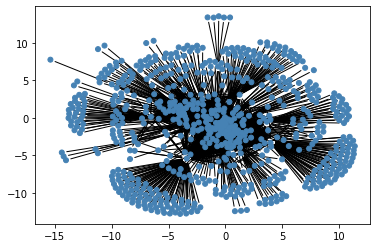

In [26]:
layout = g.layout_fruchterman_reingold()
fig, ax = plt.subplots()
ig.plot(g, layout=layout, target=ax)
# , vertex_label=[v['name'] for v in g.vs])

In [27]:
# gephi = igg.GephiConnection()
# streamer = igg.GephiGraphStreamer()
# streamer.post(g, gephi)

Similarly I should get acquainted with how i can pickle/cache `Site`s and `Graph`s:

In [28]:
# import pickle

# with open('mrrobotgraph.pickle', 'wb') as handle:
#     pickle.dump(g, handle, protocol=pickle.HIGHEST_PROTOCOL)

In [29]:
# with open('mrrobotgraph.pickle', 'rb') as handle:
#     g = pickle.load(handle)

A generic status printout to keep at the bottom of the experiment:

In [30]:
print(f'vertices: {len(g.vs)}, edges: {len(g.es)}')

print(g.vs[0])
print(g.vs[1])

# print(g)

vertices: 674, edges: 2259
igraph.Vertex(<igraph.Graph object at 0x11f230a90>, 0, {'contributors': '', 'pageid': 0, 'revision_count': 0, 'categories': '', 'namespace': ':Category:', 'vertex_group': '', 'name': 'Category:Season 1', 'Label': 'Category:Season 1'})
igraph.Vertex(<igraph.Graph object at 0x11f230a90>, 1, {'contributors': 'Tsercele', 'pageid': 4617, 'revision_count': 3, 'categories': 'Category:Season 1, Category:Season 2, Category:Organizations', 'namespace': ':', 'vertex_group': 'Category:Season 1', 'name': 'Comet Electric', 'Label': 'Comet Electric'})
